In [125]:
import sys
from pathlib import Path
from data.input_data import DatasetCreator
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, MiniBatchKMeans

In [126]:
# Get the absolute path of the current file
current_file_path = Path('cluster_k_means.ipynb').resolve()

# Get the directory of the current file
project_dir = current_file_path.parent

# Add the project directory to sys.path
sys.path.insert(0, str(project_dir))


# Step 1: Create Datasets
dataset_creator = DatasetCreator()
blob_dataset = dataset_creator.create_blob_dataset()
points_dataset = dataset_creator.create_points_dataset()

In [127]:
X_blob, y_blob = blob_dataset['X'], blob_dataset['y']
X_points = points_dataset['X']

In [128]:
# Step 2: Create and Fit KMeans and MiniBatchKMeans models for make_blob dataset
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_blob)
kmeans_labels = kmeans.predict(X_blob)

minibatch_kmeans = MiniBatchKMeans(n_clusters=3, random_state=42, batch_size=100)
minibatch_kmeans.fit(X_blob)
minibatch_kmeans_labels = minibatch_kmeans.predict(X_blob)

In [129]:
# Step 3: Create and Fit KMeans and MiniBatchKMeans models on points dataset
kmeans_points = KMeans(n_clusters=3, random_state=42)
kmeans_points.fit(X_points)
kmeans_points_labels = kmeans_points.predict(X_points)

minibatch_kmeans_points = MiniBatchKMeans(n_clusters=3, random_state=42, batch_size=100)
minibatch_kmeans_points.fit(X_points)
minibatch_kmeans_points_labels = minibatch_kmeans_points.predict(X_points)

In [130]:
# Step 4: Plot the Clusters
def plot_clusters(X, labels, title):
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', marker='.')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

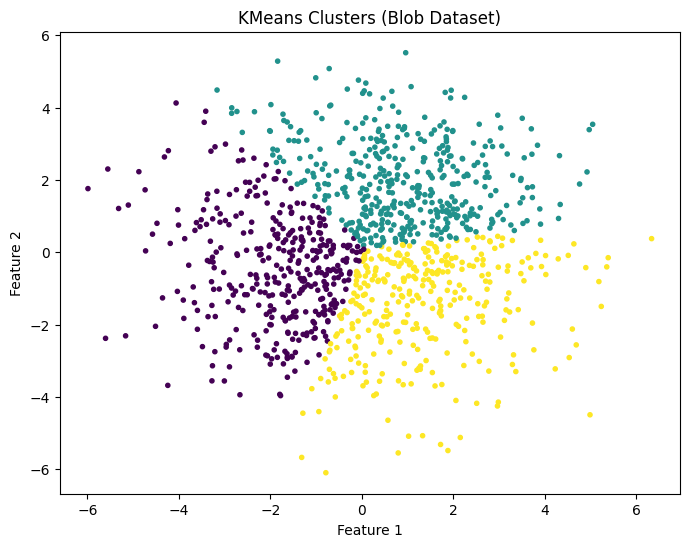

In [131]:
# Plot clusters for the blob dataset
plot_clusters(X_blob, kmeans_labels, 'KMeans Clusters (Blob Dataset)')

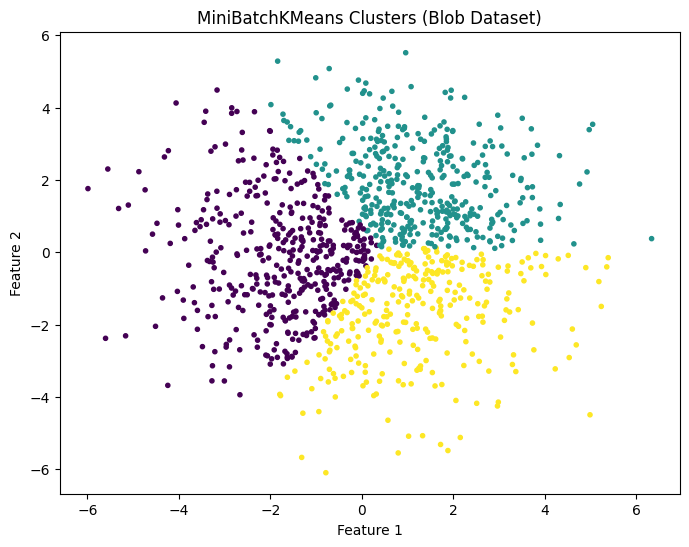

In [132]:
plot_clusters(X_blob, minibatch_kmeans_labels, 'MiniBatchKMeans Clusters (Blob Dataset)')

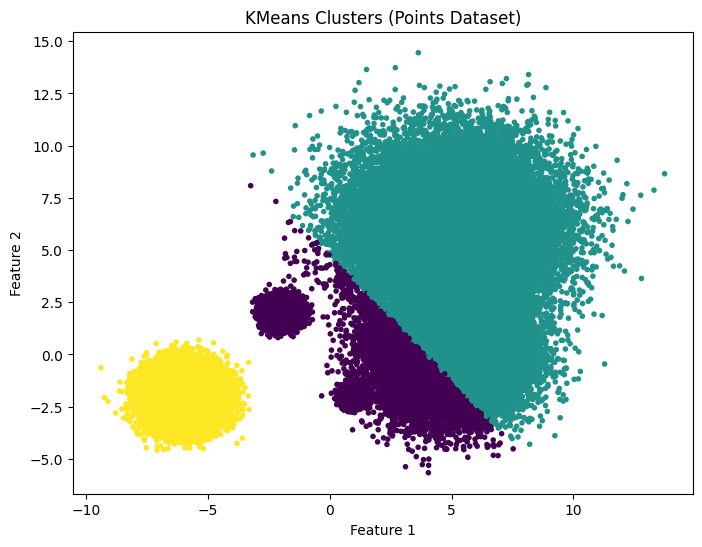

In [133]:
# Plot clusters for the points dataset
plot_clusters(X_points, kmeans_points_labels, 'KMeans Clusters (Points Dataset)')

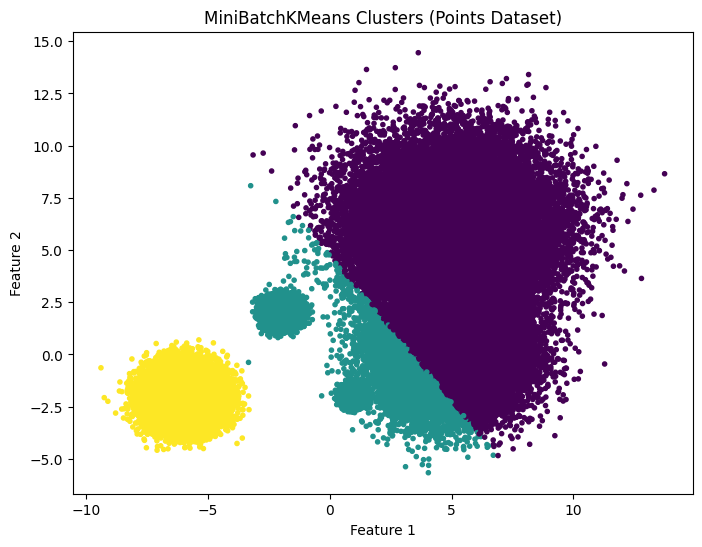

In [134]:
plot_clusters(X_points, minibatch_kmeans_points_labels, 'MiniBatchKMeans Clusters (Points Dataset)')

To create several alternative models by changing parameters like the number of clusters and distance metrics, and to visualize the cluster centers, you can extend the starter code. Below, I've added additional models with varying parameters and included the visualization of cluster centers.


In [135]:
# Step 1: Create and Fit KMeans and MiniBatchKMeans models with different parameters
models = {
    'KMeans_3_clusters': KMeans(n_clusters=3, random_state=42),
    'KMeans_4_clusters': KMeans(n_clusters=4, random_state=42),
    'KMeans_5_clusters': KMeans(n_clusters=5, random_state=42),
    'MiniBatchKMeans_3_clusters': MiniBatchKMeans(n_clusters=3, random_state=42, batch_size=100),
    'MiniBatchKMeans_4_clusters': MiniBatchKMeans(n_clusters=4, random_state=42, batch_size=100),
    'MiniBatchKMeans_5_clusters': MiniBatchKMeans(n_clusters=5, random_state=42, batch_size=100),
}

# Fit models on the blob dataset
labels_blob = {}
centers_blob = {}
for name, model in models.items():
    model.fit(X_blob)
    labels_blob[name] = model.predict(X_blob)
    centers_blob[name] = model.cluster_centers_

# Fit models on the points dataset
labels_points = {}
centers_points = {}
for name, model in models.items():
    model.fit(X_points)
    labels_points[name] = model.predict(X_points)
    centers_points[name] = model.cluster_centers_


In [136]:
# Step 2: Plot the Clusters with Cluster Centers
def plot_clusters(X, labels, centers, title):
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', marker='.')
    plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='x', s=200, label='Centers')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()

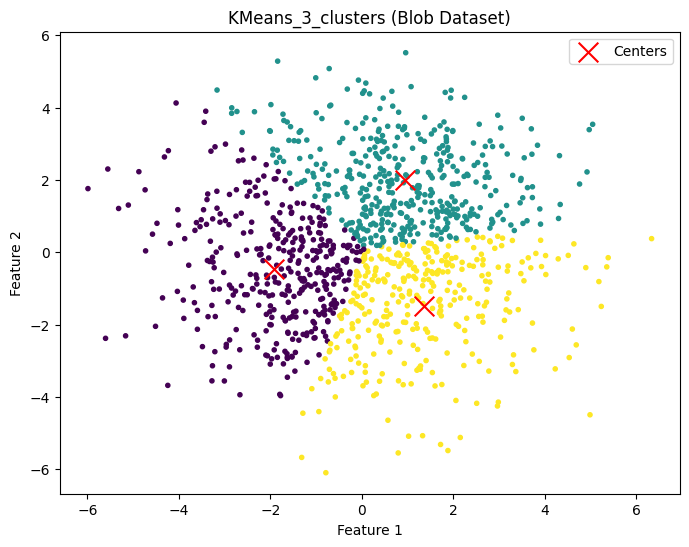

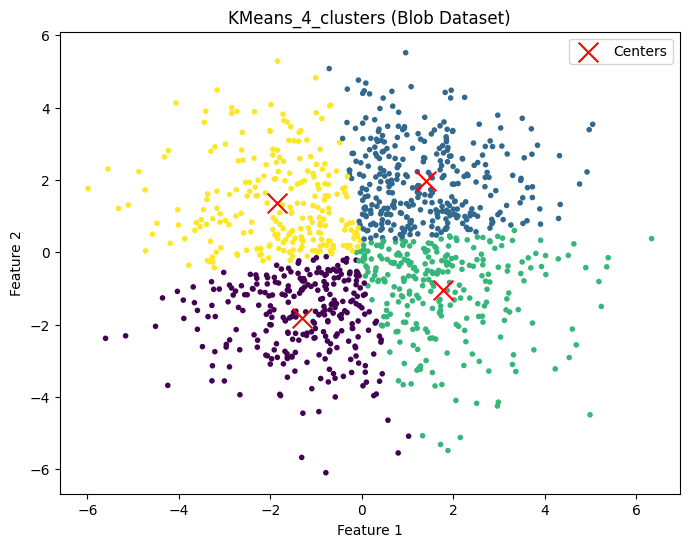

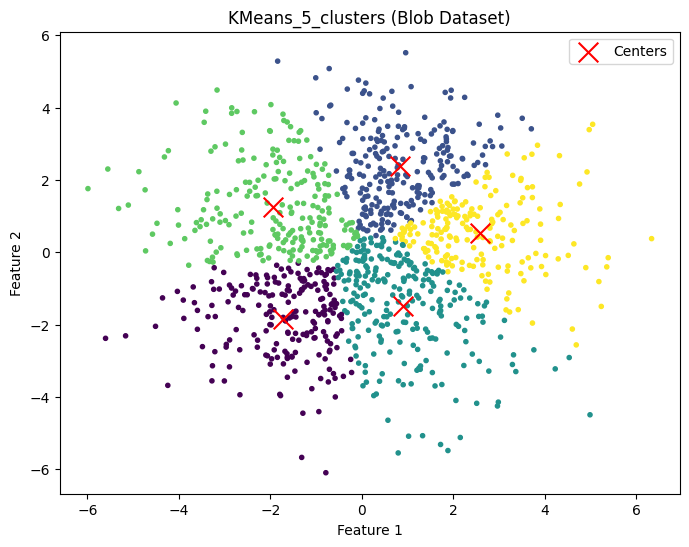

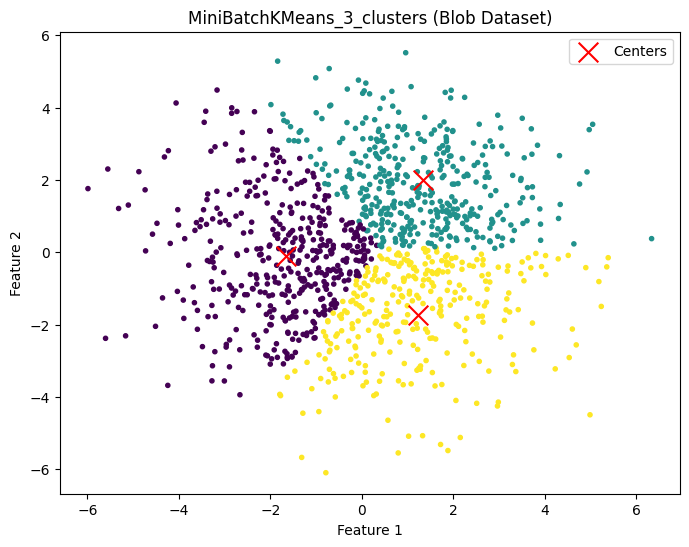

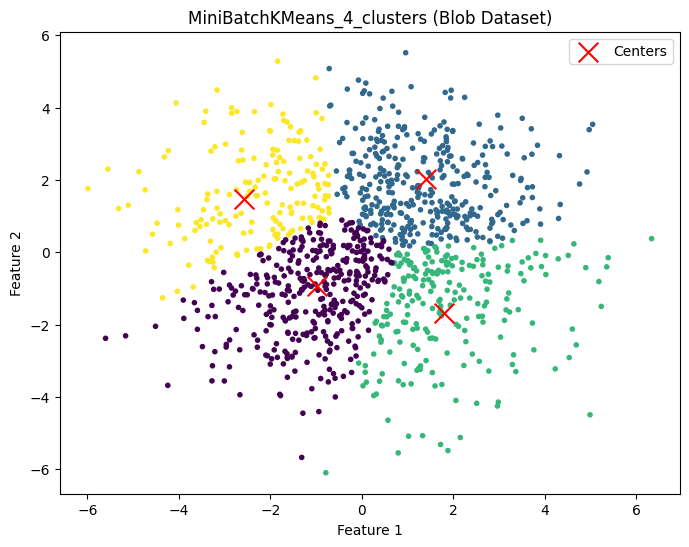

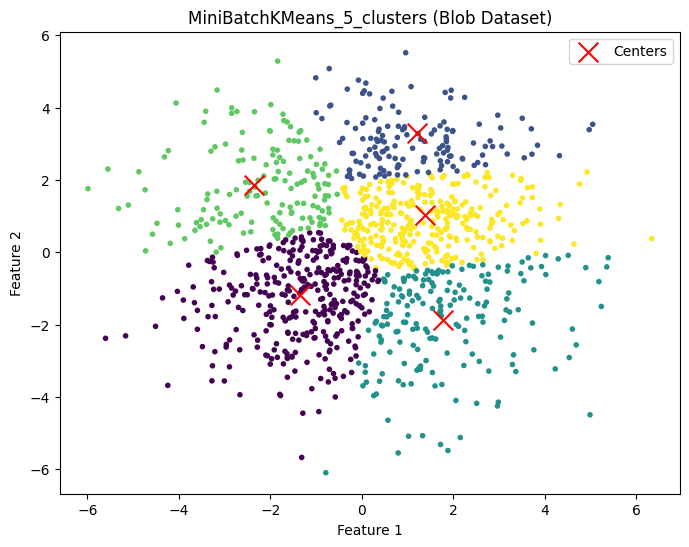

In [137]:
# Plot clusters for the blob dataset
for name in labels_blob.keys():
    plot_clusters(X_blob, labels_blob[name], centers_blob[name], f'{name} (Blob Dataset)')

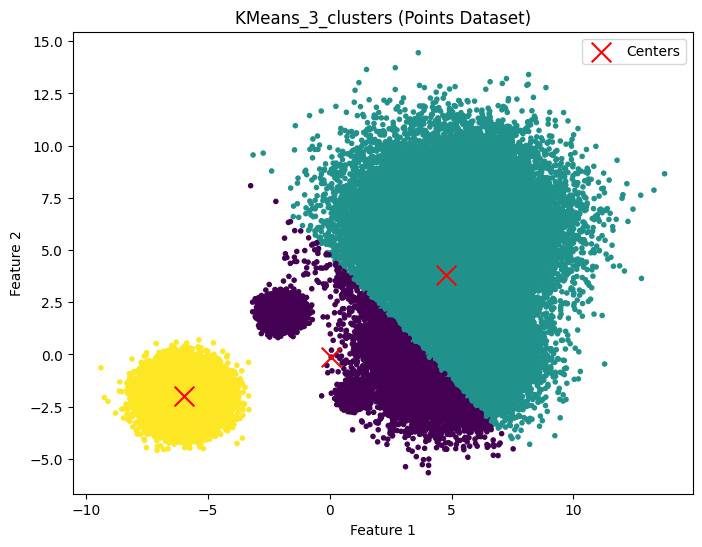

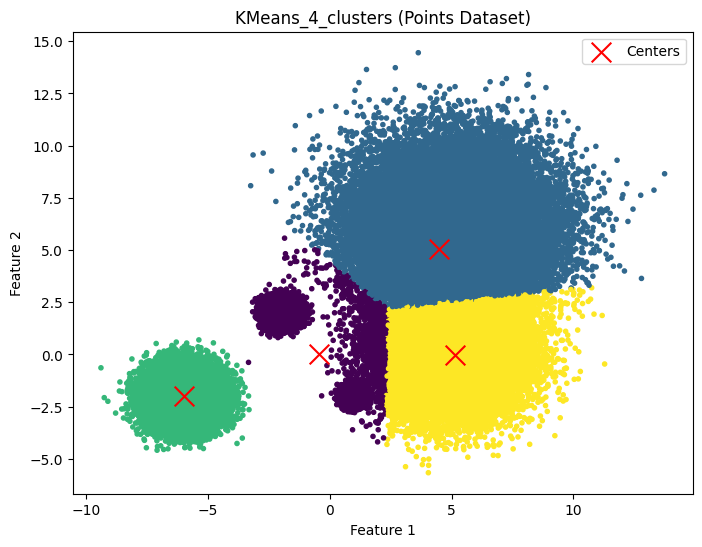

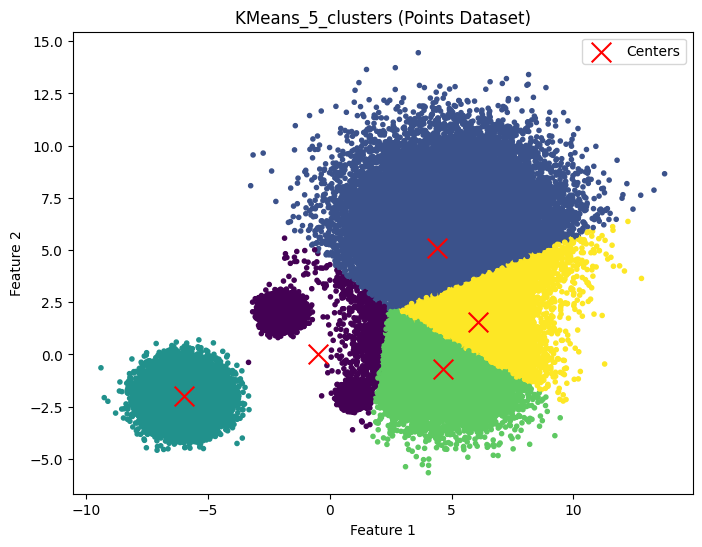

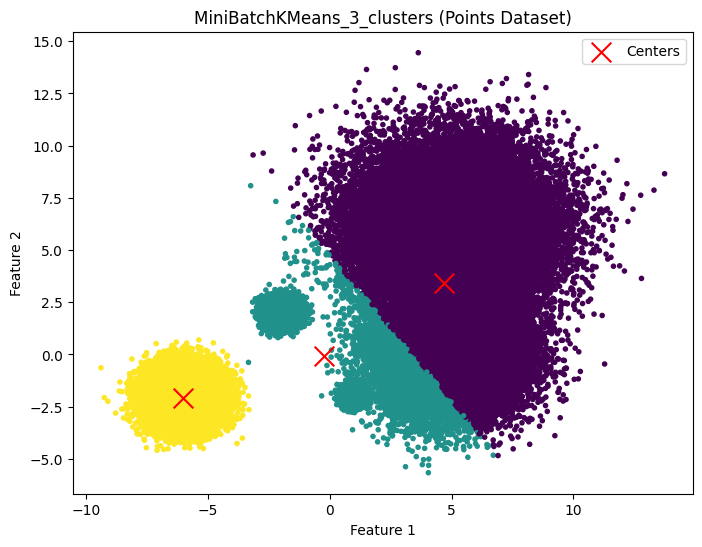

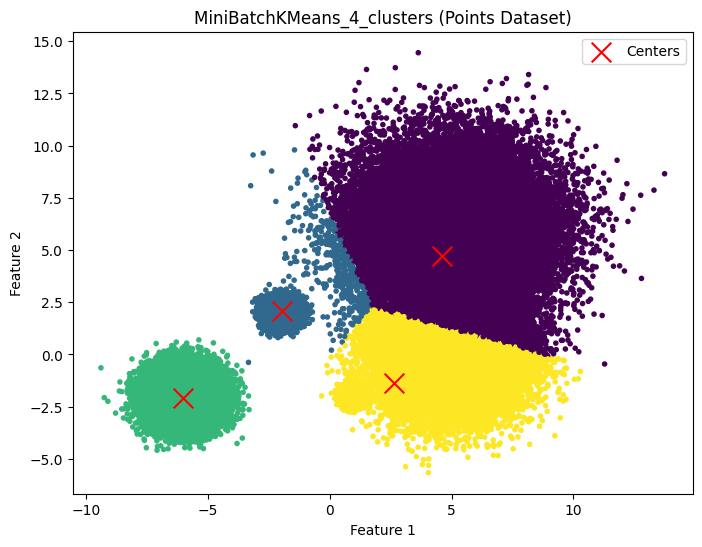

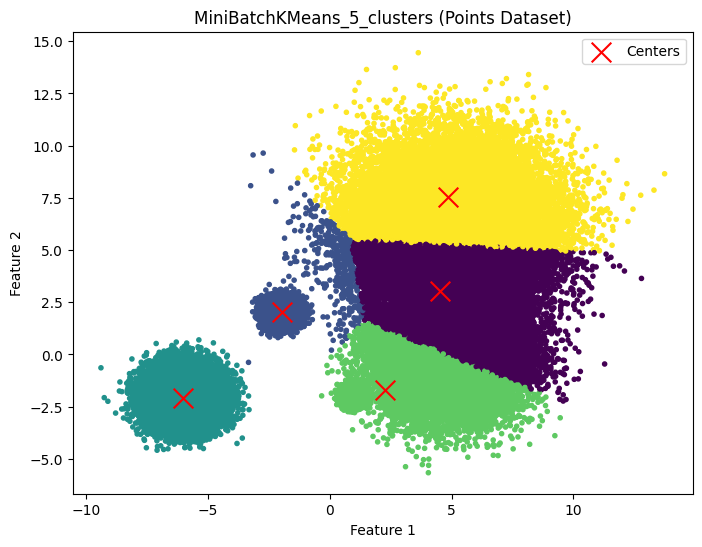

In [138]:
# Plot clusters for the points dataset
for name in labels_points.keys():
    plot_clusters(X_points, labels_points[name], centers_points[name], f'{name} (Points Dataset)')